# **How to Run this Code?**

There are three approaches in this notebook. Approach one will require a GPU, approach two may be able to run on a local CPU (Google Colab will crash), and approach three can run on a CPU and Google Colab.

Each approach is separated by a header tag (#).

## Getting the Data

All the data is in the following folder. Each approach uses different data, and we only included the preprocessed data in this folder due to the size of the original data being too large for easy running.

Data: https://drive.google.com/drive/folders/1DH2YfbXKo9QAbEVsC5pTU0ujsjiOZYZh?usp=drive_link

*Please make sure data file paths are correct when loading the data in your environment.*

## Approach One:

**Normal vs. Horizontal Misalignment (2.00 mm):**

Binary Classification of All Speeds for Normal State vs. Fault State at Each Speed using Time Series Data with an LSTM approach.

Data is in the folder titled **Normal and 2.00 mm**, and each folder contains 49 CSVs.

Approx takes 3.5 hours

## Approach Two:

**Multi-Class Classification of All Fault Types**

Multi-Class Classification of Normal and All Faults at a Single Similar Speed Using Time Series Data.

Data is in the folder titled **AllMotorFailuresClassified_SingleSpeed.csv**.

Approx takes 2 hours

## Approach Three:

**Multi-Class Classification of 10 Fault Types**

Multi-Class Classification of Normal and 10 Faults at a Single Similar Speed Using Feature Extraction.

Data titled: **Train_and_Test_combined_with_tenClasses.csv**

Approx takes a couple of minutes


# Approach One

**Normal vs. Horizontal Misalignment (2.00 mm):**


Binary Classification of All Speeds for Normal State vs. Fault State at Each Speed using Time Series Data with an LSTM approach


In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Horzontal Misalignment - 2.0 mm - entire folder
folder_path = "Data/2.0mm"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

hm_dataframes = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None)
    df.columns = [
        "Tachometer Signal",
        "Underhang Axial",
        "Underhang Radial",
        "Underhang Tangential",
        "Overhang Axial",
        "Overhang Radial",
        "Overhang Tangential",
        "Microphone"
    ]
    hm_dataframes.append(df)


horizontal_misalignment_dataframe = pd.concat(hm_dataframes, ignore_index=True)
horizontal_misalignment_dataframe.head()

,Tachometer Signal,Underhang Axial,Underhang Radial,Underhang Tangential,Overhang Axial,Overhang Radial,Overhang Tangential,Microphone
0,-0.58799,-1.224100,-0.33981,-0.151280,-3.6099,-0.50254,-2.4228,0.066906
1,-0.60194,0.916560,0.31406,-0.008354,-3.5724,-0.49731,-2.3426,-0.065540
2,-0.59545,-0.926840,-0.47357,-0.044663,-3.6078,-0.49901,-2.3839,0.113640
3,-0.59255,0.271080,0.20290,0.042612,-3.5915,-0.49978,-2.3407,-0.071698
4,-0.60230,-0.019057,-0.22608,-0.032941,-3.5966,-0.49917,-2.3470,0.048750


In [ ]:
# Normal - entire folder
folder_path = "Data/normal"

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None)
    df.columns = [
        "Tachometer Signal",
        "Underhang Axial",
        "Underhang Radial",
        "Underhang Tangential",
        "Overhang Axial",
        "Overhang Radial",
        "Overhang Tangential",
        "Microphone"
    ]
    dataframes.append(df)


normal_dataframe = pd.concat(dataframes, ignore_index=True)
normal_dataframe.head()

,Tachometer Signal,Underhang Axial,Underhang Radial,Underhang Tangential,Overhang Axial,Overhang Radial,Overhang Tangential,Microphone
0,4.5595,0.175200,0.287210,-0.017751,-0.41565,0.032459,-0.11218,-0.128140
1,4.6038,-0.051295,-0.194050,-0.060071,-0.41809,0.036547,-0.11043,0.118310
2,4.5703,-0.969080,0.038033,-0.028329,-0.43081,0.041924,-0.14331,-0.071527
3,4.5870,0.891270,0.072973,0.007453,-0.40017,0.041090,-0.11984,0.043445
4,4.5887,-1.716000,-0.329290,-0.033063,-0.50281,0.040474,-0.25270,0.023901


In [ ]:
normal_dataframe['target'] = 0
horizontal_misalignment_dataframe['target'] = 1

In [ ]:
final_data = pd.concat([normal_dataframe, horizontal_misalignment_dataframe], axis=0, ignore_index=True)

In [ ]:
data = final_data.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
df = final_data.copy()
X = df.drop(columns=['target']).values
y = df['target'].values

X = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")

# Approach Two


**Multi-Class Classification of All Fault Types**

Multi-Class Classification of Normal and All Faults at a Single Similar Speed Using Time Series Data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
raw_data = pd.read_csv("AllMotorFailuresClassified_SingleSpeed.csv")

In [ ]:
raw_data['source_file'] = raw_data['source_file'].str.replace('.csv', '', regex=False).astype(float)

raw_data['source_file'].unique()

array([31.744 , 31.5392, 31.3344, 31.1296, 31.9488])

In [ ]:
label_encoder = LabelEncoder()

raw_data['Classification'] = label_encoder.fit_transform(raw_data['Classification'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)
print(raw_data['Classification'].unique())


Label Mapping: {'Horizontal Misalignment': 0, 'Imbalance': 1, 'Normal': 2, 'Overhang Ball Fault': 3, 'Overhang Cage Fault': 4, 'Overhang Outer Race Fault': 5, 'Underhang Ball Fault': 6, 'Underhang Cage Fault': 7, 'Underhang Outer Race Fault': 8, 'Vertical Misalignment': 9}
[2 0 9 1 3 4 5 6 7 8]


In [ ]:
df = raw_data.copy()

X = df.drop(columns=['Classification']).values
y = df['Classification'].values

X = X.reshape((X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))  # 10 output units, one for each class

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Approach Three

**Multi-Class Classification of 10 Fault Types**

Multi-Class Classification of Normal and 10 Faults at a Single Similar Speed Using Feature Extraction

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = '/content/drive/Shareddrives/CMPE 252 - Group Project/Final Project/04 - Final Submissions/Data/Train_and_Test_combined_with_tenClasses.csv'

In [ ]:
raw_data = pd.read_csv(file_path)

In [ ]:
raw_data.select_dtypes(include=['object'])

,condition,file_path,Category,tenClasses
0,horizontal-misalignment,D:\Vibration Data\test\horizontal-misalignment...,horizontal-misalignment_0.5mm,horizontal-misalignment
1,horizontal-misalignment,D:\Vibration Data\test\horizontal-misalignment...,horizontal-misalignment_0.5mm,horizontal-misalignment
2,horizontal-misalignment,D:\Vibration Data\test\horizontal-misalignment...,horizontal-misalignment_0.5mm,horizontal-misalignment
3,horizontal-misalignment,D:\Vibration Data\test\horizontal-misalignment...,horizontal-misalignment_0.5mm,horizontal-misalignment
4,horizontal-misalignment,D:\Vibration Data\test\horizontal-misalignment...,horizontal-misalignment_0.5mm,horizontal-misalignment
...,...,...,...,...
1946,vertical-misalignment,D:\Vibration Data\train\vertical-misalignment\...,vertical-misalignment_1.90mm,vertical-misalignment
1947,vertical-misalignment,D:\Vibration Data\train\vertical-misalignment\...,vertical-misalignment_1.90mm,vertical-misalignment
1948,vertical-misalignment,D:\Vibration Data\train\vertical-misalignment\...,vertical-misalignment_1.90mm,vertical-misalignment
1949,vertical-misalignment,D:\Vibration Data\train\vertical-misalignment\...,vertical-misalignment_1.90mm,vertical-misalignment


In [ ]:
columns_to_drop = ['condition', 'file_path', 'Category', 'tenClasses']
raw_data = raw_data.drop(columns=columns_to_drop)

In [ ]:
raw_data = raw_data.rename(columns={'tenClassesID': 'classification'})

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Columns: 170 entries, Underhang Axial_mean to classification
dtypes: float64(169), int64(1)
memory usage: 2.5 MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss

In [ ]:
X = raw_data.drop(columns=['classification']).values
y = raw_data['classification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Log Loss: {logloss:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 98.21%
Log Loss: 0.0874
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       1.00      0.97      0.98        67
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00        27
           4       0.95      1.00      0.97        38
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        38
           8       1.00      1.00      1.00        37
           9       0.98      0.98      0.98        60

    accuracy                           0.98       391
   macro avg       0.97      0.97      0.97       391
weighted avg       0.98      0.98      0.98       391



<ipython-input-11-e80c27800a04>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


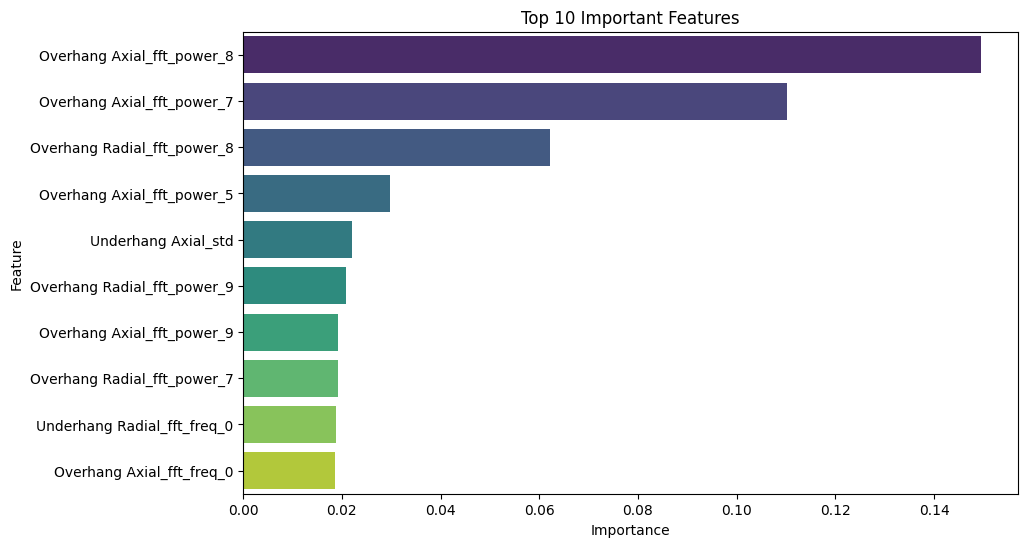

In [ ]:
# Optional: Feature Importance
importances = xgb.feature_importances_
feature_names = raw_data.drop(columns=['classification']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Step 6: Plot Top 10 Important Features
top_10_features = importance_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

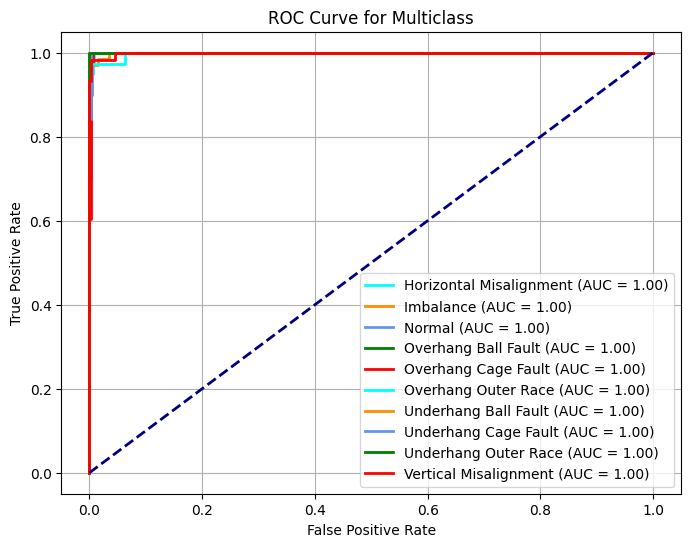

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
import numpy as np

# Mapping of class IDs to class names
class_mapping = {
    0: 'Horizontal Misalignment',
    1: 'Imbalance',
    2: 'Normal',
    3: 'Overhang Ball Fault',
    4: 'Overhang Cage Fault',
    5: 'Overhang Outer Race',
    6: 'Underhang Ball Fault',
    7: 'Underhang Cage Fault',
    8: 'Underhang Outer Race',
    9: 'Vertical Misalignment'
}

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding for classes
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i in range(n_classes):
    class_name = class_mapping.get(i, f'Class {i}')
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<ipython-input-32-b557e0e0636a>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_classes))


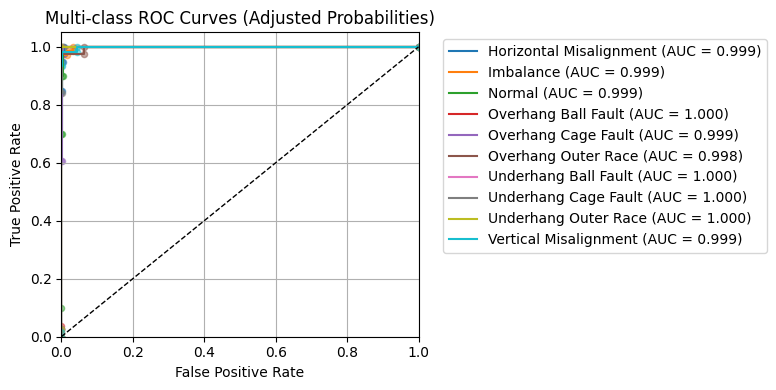

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Add small epsilon to prevent extreme probabilities
epsilon = 1e-15
y_pred_proba_adjusted = np.clip(y_pred_proba, epsilon, 1 - epsilon)

# Normalize probabilities to ensure they sum to 1
y_pred_proba_adjusted = y_pred_proba_adjusted / y_pred_proba_adjusted.sum(axis=1)[:, np.newaxis]

# using y_pred_proba_adjusted instead of y_pred_proba
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_adjusted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot with more detailed threshold points
plt.figure(figsize=(8, 4))
colors = plt.cm.get_cmap('tab10')(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    class_name = class_mapping.get(i, f'Class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label=f'{class_name} (AUC = {roc_auc[i]:.3f})')
    # Add markers to show actual threshold points
    plt.scatter(fpr[i], tpr[i], color=color, s=20, alpha=0.5)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves (Adjusted Probabilities)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

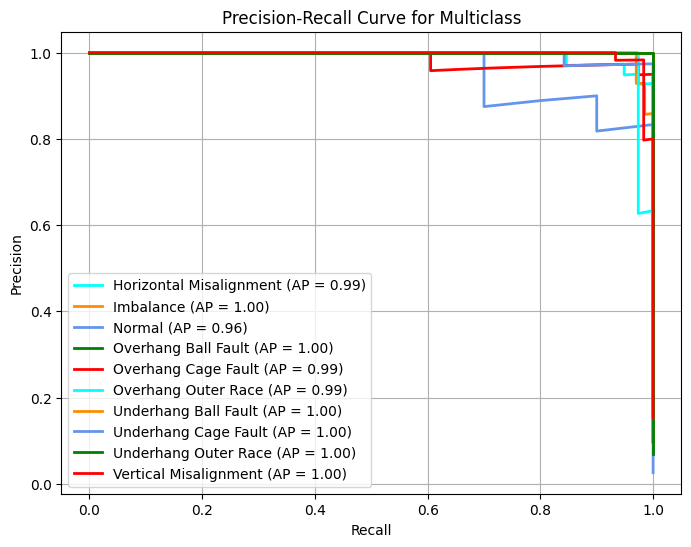

In [ ]:
precision = dict()
recall = dict()
average_precision = dict()


for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_proba[:, i])


plt.figure(figsize=(8, 6))
for i in range(n_classes):
    class_name = class_mapping.get(i, f'Class {i}')
    plt.plot(recall[i], precision[i], color=colors[i % len(colors)], lw=2, label=f'{class_name} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc='best')
plt.grid(True)
plt.show()
